# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis

##### Q1 -- are movies with long runtime  runtime and popular produced more than those less popular?


#### Q2---which top 10 drectors directed movies released last year with high revenue

In [4]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01  4% |█▌                              | 501kB 27.2MB/s eta 0:00:01    15% |█████                           | 1.7MB 21.9MB/s eta 0:00:01    27% |████████▊                       | 2.9MB 24.0MB/s eta 0:00:01    49% |████████████████                | 5.2MB 28.2MB/s eta 0:00:01    74% |███████████████████████▊        | 7.7MB 27.4MB/s eta 0:00:01    85% |███████████████████████████▍    | 8.9MB 24.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.2MB/s eta 0:00:01   59% |███████████████████             | 8.0MB 23.7MB/s eta 0:00:01    77% |████████████████████████▋       | 10.3MB 24.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninst

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [5]:
# read moivies dataset into a datafrme
df=pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')

# display first two rows of data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
# get information about the dataset to see which columns contain nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# get an overall description of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


dropping unnecessary columns which will not be usefull in answering the afore questions

In [44]:
# drop colums which are not needed
df.drop(['id','imdb_id','tagline','cast','homepage', 'keywords','overview','release_date','vote_count' ], axis = 1, inplace = True)

In [7]:
# check if there are rows with nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


drop rows with nulls since they are strings so all rows don't have missing data

In [8]:
# drop rows with null since there appear to be some null in director, genre and production companies 
df.dropna(inplace=True)

In [9]:
# verify if all rows no longer contain nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
vote_average            9807 non-null float64
release_year            9807 non-null int64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 996.0+ KB


plot of the whole data set showing how each colum data correlate to each other

In [22]:
# create  a dataframe to contain all correlations of data with numberic values
correlation=df[['popularity','revenue','release_year','runtime','budget','budget_adj','revenue_adj']].corr()
correlation

,popularity,revenue,release_year,runtime,budget,budget_adj,revenue_adj
popularity,1.000000,0.663358,0.089801,0.139033,0.545472,0.513550,0.609083
revenue,0.663358,1.000000,0.057048,0.162838,0.734901,0.706427,0.919110
release_year,0.089801,0.057048,1.000000,-0.117204,0.115931,0.016793,-0.066256
runtime,0.139033,0.162838,-0.117204,1.000000,0.191283,0.221114,0.175676
budget,0.545472,0.734901,0.115931,0.191283,1.000000,0.968963,0.622505
budget_adj,0.513550,0.706427,0.016793,0.221114,0.968963,1.000000,0.646607
revenue_adj,0.609083,0.919110,-0.066256,0.175676,0.622505,0.646607,1.000000


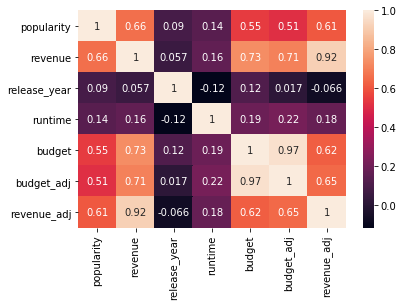

In [24]:
# plot a heatmap with seaborn to visualize the correlations above
sns.heatmap(correlation, annot=True);

##### The heatmap map above shows that the budget highly correlates with budget_adj and 
#### revenue with revenue_adj as  described in the dataset description


In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,9807.000000,9.807000e+03,9.807000e+03,9807.000000,9807.000000,9807.000000,9.807000e+03,9.807000e+03
mean,0.693133,1.612666e+07,4.407345e+07,102.743245,5.966361,2000.891200,1.935178e+07,5.684958e+07
std,1.035473,3.216685e+07,1.223983e+08,28.133335,0.914297,13.032032,3.562014e+07,1.512176e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231585,0.000000e+00,0.000000e+00,90.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418900,1.457860e+05,0.000000e+00,100.000000,6.000000,2005.000000,2.423044e+05,0.000000e+00
75%,0.774204,1.900000e+07,3.063954e+07,112.000000,6.600000,2011.000000,2.442295e+07,4.254888e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (are movieswith long runtime  runtime and popular produced more than those less popular?)

calculate mean popularty

In [58]:
# get mean popularity value
mean_popularity = df['popularity'].mean()
mean_popularity

0.64644095196024287

calculte mean duration

In [59]:
# calculate th average runtime for each movie
mean_duration =df['runtime'].mean()

movies with high runtime

In [65]:
# get all movies with high runtime and are more popular
df_long_dur_hpop=df.query('runtime > @mean_duration & popularity > @mean_popularity')
df_long_dur_hpop.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08


long duration movies less popular

In [64]:
# get all movies with high runtime and are less popular
df_long_dur_lpop=df.query('runtime > @mean_duration & popularity <= @mean_popularity')
df_long_dur_lpop.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
219,0.629561,0,0,Septembers of Shiraz,Wayne Blair,110,Drama|Thriller,Eclectic pictures|AMBI Group,5.9,2015,0.0,0.000000
220,0.607124,0,8034,Every Thing Will Be Fine,Wim Wenders,118,Drama,Neue Road Movies|Film i VÃ¤st|Montauk Producti...,5.1,2015,0.0,7391.276748
221,0.606113,0,0,Extinction,Miguel Ãngel Vivas,110,Drama|Horror|Science Fiction,Vaca Films|La Ferme! Productions|Laokoon Filmg...,5.3,2015,0.0,0.000000


chech if long runtime and more popular movies  are
more than long runtime and less popular

In [66]:
# are the number of movies with long runtime and high popularity more than those
# with long runtime and less popularity
df_long_dur_hpop.shape[0]>df_long_dur_lpop.shape[0]

False

create a function which when called plots a bar chart

In [67]:
def plot_bar(x_values, y_values, tite, xlabel, ylabel):
#  A function to draw a histgram 
     plt.bar(x_values,y_values)
     plt.title(title)
     plt.xlabel(xlabel)
     plt.ylabel(ylabel)
     

a bar chart plot to visualize the results using shape[0] to get number of rows=number of movies in each set

In [68]:
# an array contaning the values on the x axes
x_values=["Popular", "less Popular"]

In [69]:
#an array y_values containing respecctive movie counts for each of the x_values
y_values=[df_long_dur_hpop.shape[0],df_long_dur_lpop.shape[0]]

In [70]:
# a title for the bar
title="Number of movies with high runtime by  popularity"

In [71]:
#label for x and y axis
xlabel="Popularity"
ylabel="movies"

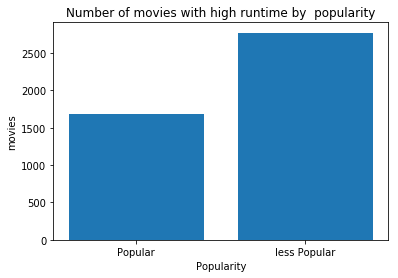

In [73]:
# calling our plot bar function defined above to plot a bar chart of 
plot_bar(x_values, y_values, title, xlabel, ylabel)

### Research Question 2  (which top 10 drectors directed movies released last year with high revenue)

get highest year of release date in dataset

In [42]:
# extract the most recent year in the dataset
last_year = max(df['release_year'])
last_year

2015

get mean revenue

In [43]:
# get mean revenue for all movies
mean_revenue=df['revenue'].mean()
mean_revenue

39823319.793392234

In [46]:
# qery all the rows for which movie year is the recent year and the revenue is greater than mean revenue
# and store in a dataframe
df_recent_high_rev = df.query('release_year == @last_year & revenue > @mean_revenue')

extract data required to answer the question

In [84]:
# get directors and their incomes from the recent year data set for movies wth high revenue
df_recent_high_rev=df_recent_high_rev[['director','revenue']]
type(df_recent_high_rev)

pandas.core.frame.DataFrame

get mean revenue generated by each director

In [85]:
# get average revenue generated by each director last year for movies with high revenues
director_revenue=df_recent_high_rev.groupby('director').revenue.mean()

to get top 10 we need to sort director_revenue in ascending order

In [55]:
# sort the series director_revenue to order in descending order
director_revenue.sort_values(ascending=False, inplace=True)

get top 10 revenue generating directors last year with a .head(10) call

In [86]:
# get top ten directors for last years movies with high revenues
top10_last_year=director_revenue.head(10)
top10_last_year

director
Adam McKay                        133346506
Alan Taylor                       440603537
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    532950503
Aleksander Bach                    82347656
Alex Kendrick                      67790117
Andy Fickman                      107597242
Anne Fletcher                      51680201
Antoine Fuqua                      91709827
Ari Sandel                         43528634
Baltasar KormÃ¡kur                203427584
Name: revenue, dtype: int64

a pie chart plot of the distribution of each director

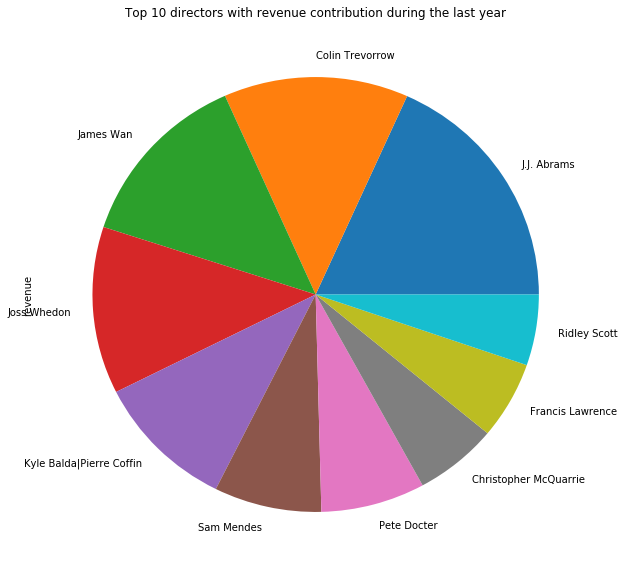

In [82]:
top10_last_year.plot(title="Top 10 directors with revenue contribution during the last year",kind='pie',figsize=(10, 10));

from the above pie chart it is cleatly seen that the the director whose movie contributed the highest revenue was J.J. Abrams

In [50]:
top10_last_year.index

Index(['J.J. Abrams', 'Colin Trevorrow', 'James Wan', 'Joss Whedon',
       'Kyle Balda|Pierre Coffin', 'Sam Mendes', 'Pete Docter',
       'Christopher McQuarrie', 'Francis Lawrence', 'Ridley Scott'],
      dtype='object', name='director')

<a id='conclusions'></a>

## Conclusions
 
movies with long runtime wihich which are more popular have been produced less than movies with long runtime and less popular

Top 10 directors with movies released last year(2015) generating the highest revenue are 
J.J. Abrams, Colin Trevorrow, James Wan, Joss Whedon, Kyle Balda|Pierre Coffin, Sam Mendes, Pete Docter, Christopher McQuarrie, Francis Lawrence, Ridley Scott


## Limitations 
1-- the dataset had so many null values which were dropped makking the conclusions above biased



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])